In [22]:
from dis import dis
# from tkinter.tix import AUTO
from requests import head
import torch
import config
import os
from glob import glob
from shutil import copyfile
import pandas as pd
import re
import numpy as np
from math import sqrt
import math
import tensorflow as tf
from keras import regularizers
from tensorflow.keras import Model, Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from re import X
import numpy as np
import torch
import pandas as pd
from torch.nn.utils.rnn import pack_padded_sequence
from torch.utils.data import DataLoader
from CustomDataset import CustomRawDataset
from model_dispatcher import dispatch_model
# from model_dispatcher_cnn import dispatch_model
import config
from torch import nn
import os
from glob import glob
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datetime import date, timedelta, datetime
import time
import random
from torch.utils.tensorboard import SummaryWriter
from CustomDataset import custom_collate_fn
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,TimeDistributed
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed", "*", "*.csv"))
# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
data=df
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged_modified.csv",index=False)
#df=pd.read_csv(r"D:\Research_Project\My_project_22\FEATURES_EXTRACTED\DISTANCES\both_hand_frontup_left_leg_frontup\aatish_both_hand_frontup_left_leg_frontup_trial1_interpolated.csv")
   
# data=df
# print(data.shape)
# target=data['54']
# data=data.drop(['54'],axis=1)
# # data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)

In [23]:
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged_modified.csv")
data.head()
# target=data['166']
# data=data.drop(['166'],axis=1)
target=data['target']
data=data.drop(['target'],axis=1)
# data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)
print(data.shape)
print(target.shape)

(12260, 166)
(12260,)


In [26]:

model = ExtraTreesClassifier()
model.fit(data,target)
# print(data.head())
# print(target.head())
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
# print("data col",data.columns)
feat_importances = pd.Series(model.feature_importances_, index=data.columns)
# print(feat_importances)

lst=list(feat_importances.nlargest(70).index)
# print(lst)
# for i in lst:
#     print(type(i))
# for i in range(166):
#     i=str(i)
#     if i not in lst:
#          data=data.drop(i,axis=1)
#         #  data.head()
# print(data.shape)
# return data,target

In [27]:
data=data[lst]
data.head()

,12,9,13,centroid_0_14_18_c,10,centroid_0_14_18_a,centroid_0_15_19_a,centroid_0_13_17_c,centroid_19_16_15_a,centroid_15_12_19_a,...,centroid_15_21_20_a,dist_21_24,dist_14_19,centroid_3_21_15_a,8,dist_5_9,dist_6_9,dist_15_18,dist_21_23,dist_23_21
0,0.113375,0.162107,0.031990,2.316167,-0.027582,0.375580,0.373833,2.270467,0.397397,0.346157,...,0.280480,0.402950,0.181946,0.294137,0.169821,0.426700,0.493265,0.159106,0.409982,0.409982
1,0.088090,0.157114,0.029938,2.317200,-0.009114,0.379317,0.378393,2.277767,0.401893,0.350710,...,0.283137,0.455762,0.177218,0.292750,0.211502,0.424375,0.487868,0.156329,0.404327,0.404327
2,0.079567,0.156264,0.029953,2.317700,-0.002401,0.380610,0.379813,2.280433,0.403303,0.352113,...,0.284523,0.470410,0.175970,0.292657,0.224825,0.423453,0.485824,0.156213,0.405290,0.405290
3,0.078291,0.155941,0.030147,2.317867,-0.001148,0.380717,0.379817,2.280833,0.403313,0.352107,...,0.284697,0.468654,0.176031,0.292577,0.224631,0.423415,0.485585,0.156523,0.407274,0.407274
4,0.077394,0.155132,0.030157,2.317967,-0.000888,0.380730,0.379800,2.280933,0.403287,0.352097,...,0.283873,0.470034,0.175919,0.291617,0.226248,0.423779,0.485758,0.156613,0.408114,0.408114


In [28]:
data.shape

(12260, 70)

In [29]:
data['target']=target

In [30]:

data.head()

,12,9,13,centroid_0_14_18_c,10,centroid_0_14_18_a,centroid_0_15_19_a,centroid_0_13_17_c,centroid_19_16_15_a,centroid_15_12_19_a,...,dist_21_24,dist_14_19,centroid_3_21_15_a,8,dist_5_9,dist_6_9,dist_15_18,dist_21_23,dist_23_21,target
0,0.113375,0.162107,0.031990,2.316167,-0.027582,0.375580,0.373833,2.270467,0.397397,0.346157,...,0.402950,0.181946,0.294137,0.169821,0.426700,0.493265,0.159106,0.409982,0.409982,0
1,0.088090,0.157114,0.029938,2.317200,-0.009114,0.379317,0.378393,2.277767,0.401893,0.350710,...,0.455762,0.177218,0.292750,0.211502,0.424375,0.487868,0.156329,0.404327,0.404327,0
2,0.079567,0.156264,0.029953,2.317700,-0.002401,0.380610,0.379813,2.280433,0.403303,0.352113,...,0.470410,0.175970,0.292657,0.224825,0.423453,0.485824,0.156213,0.405290,0.405290,0
3,0.078291,0.155941,0.030147,2.317867,-0.001148,0.380717,0.379817,2.280833,0.403313,0.352107,...,0.468654,0.176031,0.292577,0.224631,0.423415,0.485585,0.156523,0.407274,0.407274,0
4,0.077394,0.155132,0.030157,2.317967,-0.000888,0.380730,0.379800,2.280933,0.403287,0.352097,...,0.470034,0.175919,0.291617,0.226248,0.423779,0.485758,0.156613,0.408114,0.408114,0


<AxesSubplot:>

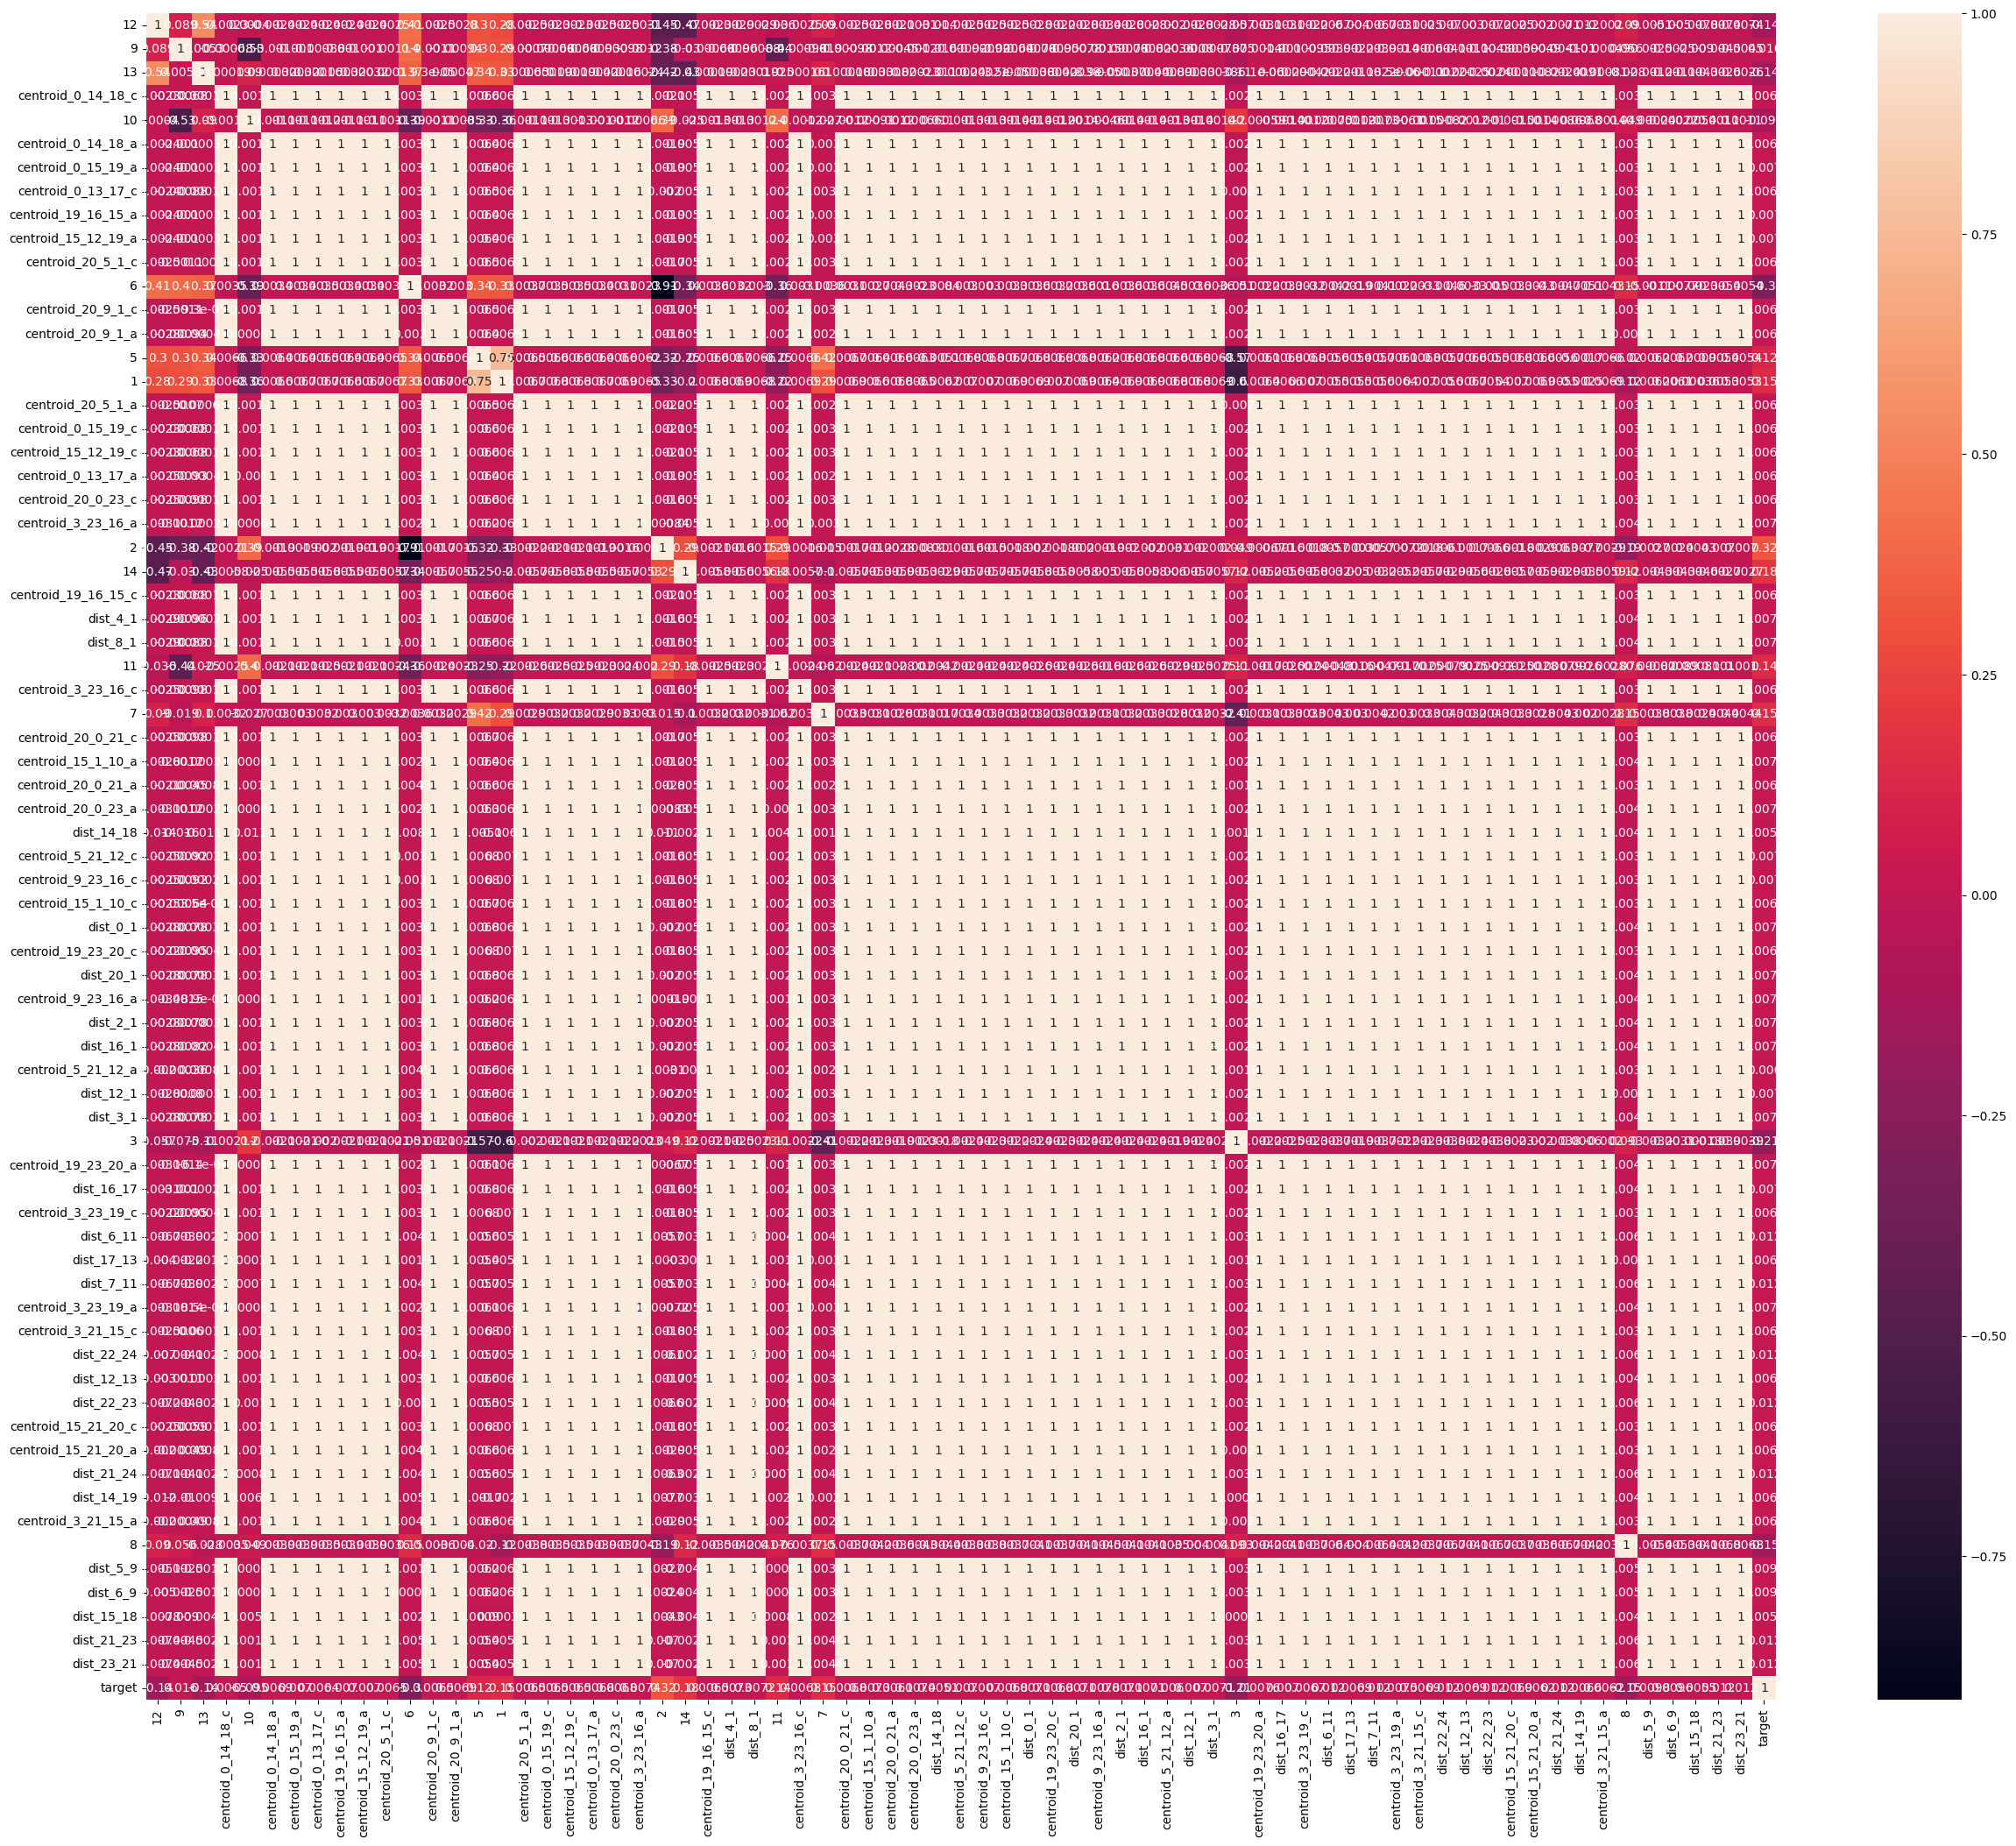

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=data.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr,annot=True)

In [32]:
def cal_snr(x):
    mean=np.mean(x)
    standard_deviation=np.std(x)
    snr=abs(mean/standard_deviation)
    return snr

In [33]:
threshold=0.8
df=abs(corr['target'])
column_name=[i for i in data.columns]
result=df[df>threshold]
result
vis_list=[]
reduced_attr=[]
for i in range(70):
    df=abs(corr[column_name[i]])
    result=df[df>threshold]
    max_index=""
    max_value=-1
    for j in result.index:
        snr_val=cal_snr(data[j].values)
        if((max_value<snr_val) and (j not in vis_list)):
            max_value=snr_val
            max_index=j
    for xp in result.index:
        vis_list.append(xp)
    if(max_value==-1):
        continue
    reduced_attr.append(max_index)


    

    # vis_list.append(list(result))
    # print('correlation of feature ',column_name[i],'\n',result,'\n')
# data=data.drop(['2','4','5','8','11'],axis=1)
# data.head()

In [34]:

data=data[reduced_attr]
reduced_attr



['12', '9', '13', 'dist_14_18', '10', '2', '5', '1', '14', '11', '7', '3', '8']

In [35]:
data.head()

,12,9,13,dist_14_18,10,2,5,1,14,11,7,3,8
0,0.113375,0.162107,0.031990,0.126636,-0.027582,0.184621,1.597459,1.650141,0.131282,0.081955,1.246003,-1.125618,0.169821
1,0.088090,0.157114,0.029938,0.125783,-0.009114,0.161124,1.614270,1.632925,0.127583,0.106628,1.296214,-1.077973,0.211502
2,0.079567,0.156264,0.029953,0.126060,-0.002401,0.153572,1.619788,1.627664,0.126045,0.115748,1.306293,-1.061660,0.224825
3,0.078291,0.155941,0.030147,0.126405,-0.001148,0.153380,1.619716,1.626473,0.125562,0.116238,1.302433,-1.055622,0.224631
4,0.077394,0.155132,0.030157,0.126424,-0.000888,0.153946,1.619620,1.624955,0.125631,0.115037,1.296863,-1.047045,0.226248


In [17]:
data['target']=target
data.head()

,9,12,dist_14_18,13,10,2,5,14,1,11,7,3,target
0,0.162107,0.113375,0.126636,0.031990,-0.027582,0.184621,1.597459,0.131282,1.650141,0.081955,1.246003,-1.125618,0
1,0.157114,0.088090,0.125783,0.029938,-0.009114,0.161124,1.614270,0.127583,1.632925,0.106628,1.296214,-1.077973,0
2,0.156264,0.079567,0.126060,0.029953,-0.002401,0.153572,1.619788,0.126045,1.627664,0.115748,1.306293,-1.061660,0
3,0.155941,0.078291,0.126405,0.030147,-0.001148,0.153380,1.619716,0.125562,1.626473,0.116238,1.302433,-1.055622,0
4,0.155132,0.077394,0.126424,0.030157,-0.000888,0.153946,1.619620,0.125631,1.624955,0.115037,1.296863,-1.047045,0


In [36]:
data.shape

(12260, 13)

In [37]:
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\extraa_tree_classifier_corr_snr_modified1.csv",index=False)

In [38]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :13], sequences[end_ix-1, 13:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [39]:

data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\extraa_tree_classifier_corr_snr_modified1.csv")
data=pd.get_dummies(data,columns=['target'])
data=data.to_numpy()
x,y=split_sequences(data,6)
# x=x[None:]
# print(x.shape)
# print(y.shape)
# data=data.to_numpy()
print(data.shape)

# y=data.iloc[:,26:]
# x=data.iloc[:,:26]
# # x=data[-1:26]
# print(x.shape)
# print(y.shape)
# x=x.to_numpy()
# y=y.to_numpy()
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(type(y_train))



model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(6,13)))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu'))
model.add(layers.BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.summary()


# model.summary()
# # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# # print(x.shape)
history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
results = model.evaluate(x_test, y_test)
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
# print(y_pred)


KeyError: "None of [Index(['target'], dtype='object')] are in the [columns]"

In [74]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(metrics.classification_report(y_test,y_pred))

Confusion matrix
 [[294   1   0   0   5   0   0   0   0   0]
 [ 12 218   4   1   0   0   0   0   2   0]
 [  0   1 238  12   0   0   0   1   0   0]
 [  1   4   1 211   1   0   3   0   1   0]
 [  1   0   0   0 255   3   3   1   2   0]
 [  0   4   1   0   8 181  18   3   1   0]
 [  0   1   3   0   1   0 275   0   5   0]
 [  0   0   1   0   0   4  16 206   0   0]
 [  0   0   0   0   1   0  10   0 239   1]
 [  0   0   1   0   4   2   5   1  17 166]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       300
           1       0.95      0.92      0.94       237
           2       0.96      0.94      0.95       252
           3       0.94      0.95      0.95       222
           4       0.93      0.96      0.94       265
           5       0.95      0.84      0.89       216
           6       0.83      0.96      0.89       285
           7       0.97      0.91      0.94       227
           8       0.90      0.95      0.92       251
          

In [75]:
print('specificity:')
tot=0
for i in range (10):
    sum=0
    for j in range(10):
        sum=sum+cf_matrix[i,j]
    spec=cf_matrix[i,i]/sum
    tot+=spec
    print(i," ",spec)
print('specificity avg\n',tot/10)

specificity:
0   0.98
1   0.919831223628692
2   0.9444444444444444
3   0.9504504504504504
4   0.9622641509433962
5   0.8379629629629629
6   0.9649122807017544
7   0.9074889867841409
8   0.952191235059761
9   0.8469387755102041
specificity avg
 0.9266484510485805


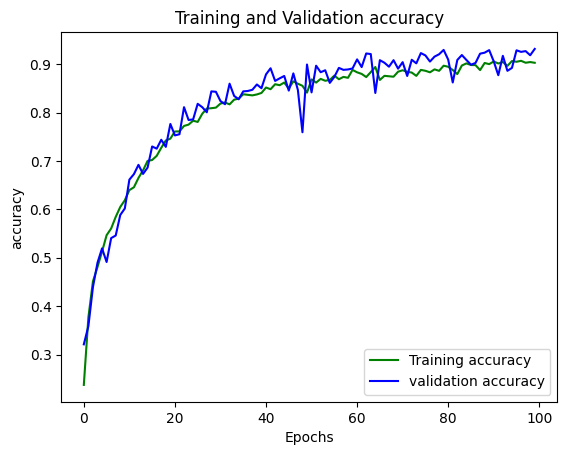

In [76]:
acc_train = history.history["accuracy"]
acc_val = history.history["val_accuracy"]
epochs = range(1,99)
plt.plot(acc_train, 'g', label='Training accuracy')
plt.plot(acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

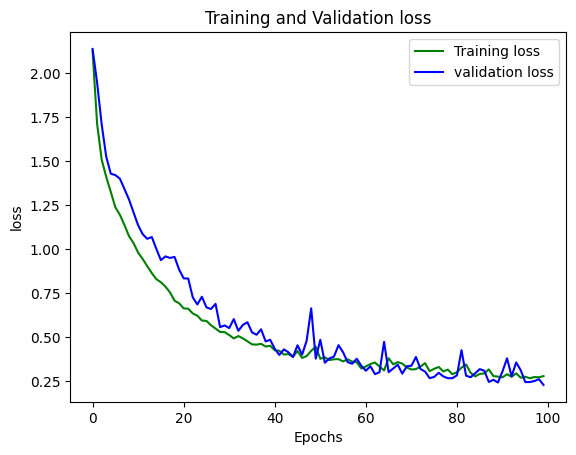

In [77]:
loss_train = history.history["loss"]
loss_val = history.history["val_loss"]
epochs = range(1,99)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()